# Training the Classifier

## Importing Libraries

In [1]:
import tensorflow as tf
import keras
from build_model import classifier_model
from training_data import load_data, preprocess_data

import matplotlib.pyplot as plt

executing inline ploting command for matplotlib

In [2]:
%matplotlib inline

## Loading and Preprocessing the dataset

loading the dataset

In [3]:
X_train, y_train, X_test, y_test = load_data()

preprocessing and finalizing the dataset for training and testing

In [4]:
X_train_classifier, y_train_classifier, X_val_classifier, y_val_classifier, X_test_classifier, y_test_classifier = preprocess_data(X_train, y_train, X_test, y_test)

## Vizualizing the Dataset

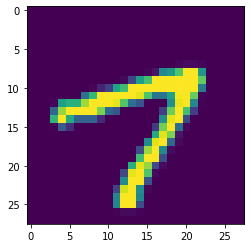

In [5]:
plt.imshow(X_train[101])

In [6]:
y_train[101]

7

## Classification Model

specifying the classification model

In [7]:
classifier = classifier_model()

classification model summary

In [8]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          3

### model training

specifying the callbacks

In [9]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>=0.98):
            print("Reached 98% accuracy so cancelling training!")
            self.model.stop_training = True

callback = myCallback()

training the model and saving the training history

In [10]:
with tf.device('/GPU:0'):
    history = classifier.fit(X_train_classifier, y_train_classifier, batch_size=32, epochs=100, verbose=1, validation_data = (X_val_classifier, y_val_classifier), callbacks = [callback])

Epoch 1/100
1688/1688 [==============================] - 136s 80ms/step - loss: 0.1687 - accuracy: 0.9477 - val_loss: 0.0540 - val_accuracy: 0.9833
Epoch 2/100
1688/1688 [==============================] - 155s 92ms/step - loss: 0.0727 - accuracy: 0.9776 - val_loss: 0.0389 - val_accuracy: 0.9885
Epoch 3/100
1688/1688 [==============================] - 149s 88ms/step - loss: 0.0572 - accuracy: 0.9824 - val_loss: 0.0303 - val_accuracy: 0.9903


In [11]:
classifier.save('classifier.h5')

## Training Evaluation

model model accuracy performance during training

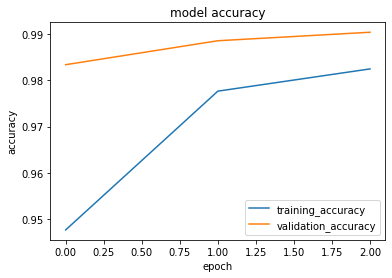

In [12]:
plt.plot(history.history['accuracy'][0:100])
plt.plot(history.history['val_accuracy'][0:100])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'validation_accuracy'], loc='lower right')
plt.show()

model loss convergence during training

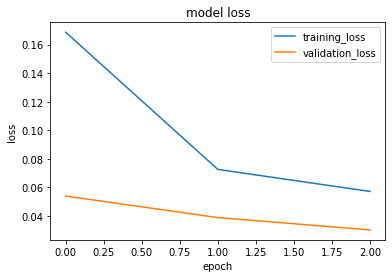

In [13]:
plt.plot(history.history['loss'][0:100])
plt.plot(history.history['val_loss'][0:100])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'], loc='upper right')
plt.show()